<a href="https://colab.research.google.com/github/moumi-18/Practise_codes/blob/master/Car_price_prediction_using_Machine_learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries/ dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and processing

In [ ]:
# Loading the data to pandas dataframe
car_data = pd.read_csv('/content/car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car_data.shape

(301, 9)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


No missing data found in the columns

In [ ]:
# Getting info about the car dataset
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_data.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [ ]:
# checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorical data

In [ ]:
# Encoding Fuel Type column
car_data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

# Encoding Seller Type column
car_data.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)

# Encoding Transmission column
car_data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting Data into Train data & Test data

In [ ]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_data['Selling_Price']

In [ ]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

Model Training

1. Linear Regression

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [ ]:
# Prediction on training data
train_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R squared error
error_score1 = metrics.r2_score(Y_train, train_data_prediction)
print(error_score1)

0.8799451660493711


In [ ]:
# Mean absolute error
error_mae = metrics.mean_absolute_error(Y_train, train_data_prediction)
print('MAE: ', error_mae)

MAE:  1.2166174093911273


Visualise the Actual Price Vs Predicted Prices

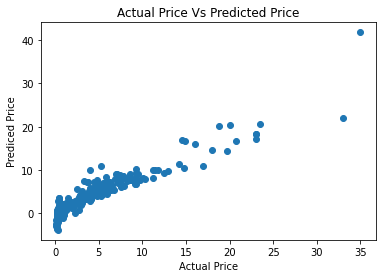

In [ ]:
plt.scatter(Y_train,train_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Prediced Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

In [ ]:
# Prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
# R squared error
error_score2 = metrics.r2_score(Y_test, test_data_prediction)
print(error_score2)

0.8365766715027051


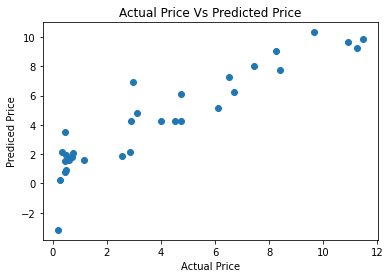

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Prediced Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

2. Using Lasso Regression

In [ ]:
lasso_reg = Lasso()

In [ ]:
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Model Evaluation

In [ ]:
train_data_prediction_lasso = lasso_reg.predict(X_train)

In [ ]:
# R-Squared
error_score3 = metrics.r2_score(Y_train, train_data_prediction_lasso)
print('Lasso R-Squared: ', error_score3)

Lasso R-Squared:  0.8427856123435794


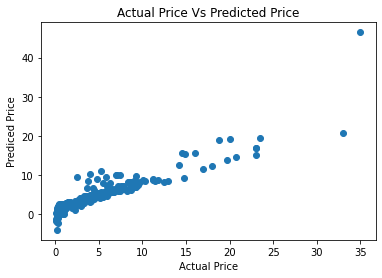

In [ ]:
plt.scatter(Y_train,train_data_prediction_lasso)
plt.xlabel('Actual Price')
plt.ylabel('Prediced Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

In [ ]:
# Prediction on test data
test_data_prediction_lasso = lasso_reg.predict(X_test)

In [ ]:
# R-Squared
error_score4 = metrics.r2_score(Y_test, test_data_prediction_lasso)
print('Lasso R-Squared: ', error_score4)

Lasso R-Squared:  0.8709167941173195


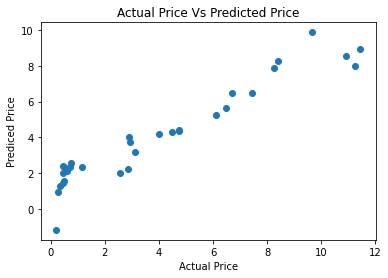

In [ ]:
plt.scatter(Y_test,test_data_prediction_lasso)
plt.xlabel('Actual Price')
plt.ylabel('Prediced Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()